In [1]:
%matplotlib inline

# Read training set

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import rankdata
import sklearn


In [15]:
neg = pd.read_csv("spectrum_avg_norm.csv",index_col=0).iloc[:3,:]
#neg = pd.concat((neg,pd.read_csv("feuille_spectrum_avg_norm.csv",index_col=0)))
neg = neg.iloc[np.random.randint(0,3,300),:]
neg += np.random.randn(*neg.shape)*0.01 #0.01 par défaut !
print(neg.iloc[:,1])

Lumiere    0.259290
Lumiere    0.289181
Ble        0.251526
Feve       0.377794
Ble        0.243862
             ...   
Lumiere    0.253156
Ble        0.253240
Feve       0.363233
Lumiere    0.274025
Feve       0.377024
Name: 398.32, Length: 300, dtype: float64


In [3]:
X = pd.read_csv("average_profile_no_outlier.csv",index_col=[0,1,2])

In [19]:
X

397.01    398.32    399.63    400.93    402.24  \
leave species stage                                                     
False N       A13    0.736060  0.711688  0.660510  0.693369  0.758253   
              A15    0.743536  0.710944  0.737078  0.765370  0.713169   
              A23    0.666861  0.619844  0.594484  0.563651  0.617043   
              A9     0.662535  0.603803  0.617870  0.652086  0.679615   
              AW     0.675668  0.635692  0.636733  0.641179  0.648871   
              L1     0.770011  0.742093  0.770512  0.796674  0.740177   
              L2     0.782803  0.795701  0.810093  0.733997  0.689168   
              L3     0.779862  0.754994  0.738089  0.667417  0.684928   
              L4     0.747644  0.739688  0.683013  0.630941  0.649907   
      R       A13    0.672307  0.647082  0.631612  0.627312  0.643466   
              A15    0.775124  0.704243  0.703837  0.687215  0.627508   
              A23    0.920419  0.903329  0.885795  0.852319  0.802040   
              A9     0.772694  0.726627  0.720050  0.701169  0.677549   
              AW     0.968626  0.901474  0.856193  0.838099  0.850751   
              L1     0.699694  0.681969  0.737539  0.733307  0.686603   
              L2     0.663336  0.620787  0.657684  0.678477  0.699098   
              L3     0.762112  0.710501  0.723347  0.709392  0.699549   
              L4     0.746821  0.711123  0.642245  0.656992  0.698478   
      V       A13    0.733399  0.670800  0.653244  0.632807  0.622638   
              A15    0.676892  0.634957  0.641234  0.628342  0.594267   
              A23    0.754434  0.715690  0.693457  0.667633  0.608376   
              A9     0.739755  0.680471  0.680266  0.658308  0.598805   
              AW     0.683652  0.633885  0.645060  0.615276  0.617673   
              L1     0.700675  0.674146  0.702470  0.778541  0.749615   
              L2     0.700308  0.644895  0.616383  0.637085  0.622428   
              L3     0.763045  0.686184  0.686733  0.686795  0.642856   
              L4     0.701849  0.656630  0.666550  0.636102  0.630887   
True  N       A13    0.617582  0.590961  0.589029  0.587242  0.524233   
              A15    0.652648  0.626239  0.629076  0.628418  0.594756   
              A23    0.551733  0.559420  0.503727  0.470671  0.527986   
              A9     0.561431  0.557710  0.591206  0.562647  0.501015   
              AW     0.758401  0.650061  0.644316  0.668283  0.577350   
              L1     0.710755  0.649411  0.591412  0.564739  0.520790   
              L2     0.645978  0.648142  0.642054  0.643863  0.609034   
              L3     0.660490  0.614750  0.671702  0.657372  0.566086   
              L4     0.605304  0.593323  0.580195  0.573281  0.542315   
      R       A13    0.491433  0.445916  0.429227  0.394472  0.418053   
              A15    0.519951  0.479453  0.465949  0.441312  0.434203   
              A23    0.671589  0.631692  0.638054  0.619311  0.561796   
              A9     0.555496  0.499264  0.519625  0.489530  0.435124   
              AW     0.632837  0.595385  0.584952  0.527051  0.497352   
              L1     0.469425  0.446959  0.475955  0.472920  0.449092   
              L2     0.534519  0.494305  0.461581  0.439225  0.455449   
              L3     0.526515  0.503633  0.460358  0.493628  0.512089   
              L4     0.473030  0.440499  0.437326  0.423055  0.419862   
      V       A13    0.488164  0.430717  0.438309  0.424405  0.377780   
              A15    0.522908  0.488691  0.501154  0.466515  0.402570   
              A23    0.532838  0.517132  0.526767  0.520134  0.473028   
              A9     0.485938  0.480222  0.455348  0.419765  0.415870   
              AW     0.507884  0.481708  0.464892  0.453821  0.407113   
              L1     0.472290  0.469708  0.467679  0.468530  0.436915   
              L2     0.534563  0.510086  0.513041  0.482037  0.418161   
              L3     0.509235  0.493050  0.478737  0.496125  0.456171   
        

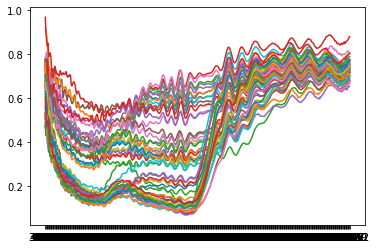

In [4]:
_=plt.plot(X.T)

In [5]:
pucerons_feuilles = X[X.index.get_level_values(0)]
pucerons_non_feuilles = X[X.index.get_level_values(0) == 0]

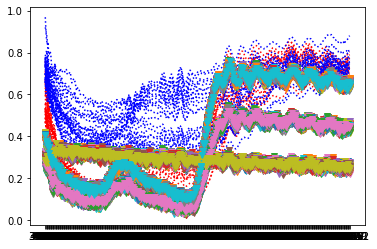

In [20]:
_ = plt.plot(pucerons_feuilles.T,'r:')
_ = plt.plot(pucerons_non_feuilles.T,'b:')
_ = plt.plot(neg.T, "v:")

In [7]:
from sklearn.svm import OneClassSVM
svm_pf = OneClassSVM(gamma='auto')
svm_p = OneClassSVM(gamma='auto')

In [8]:
svm_pf.fit(pucerons_feuilles)
svm_p.fit(pucerons_non_feuilles)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

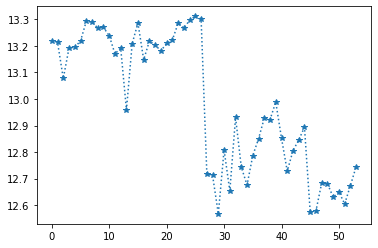

In [9]:
plt.plot(svm_p.score_samples(X),"*:")

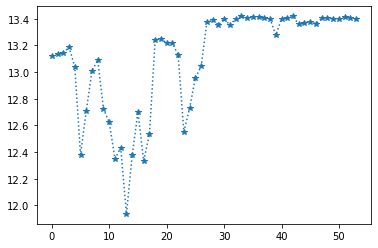

In [10]:
plt.plot(svm_pf.score_samples(X),"*:")

In [28]:
svm_pf.predict(pucerons_feuilles)

array([-1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1, -1])

In [29]:
svm_p.predict(pucerons_non_feuilles)

array([ 1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

In [11]:
import pickle
pickle.dump(svm_pf,open("SVM_pf.model","wb"))

In [12]:
pickle.dump(svm_p,open("SVM_p.model","wb"))